In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Survey Form Responses-Final.csv')

In [3]:
data.head()

,RID,Gender,Age,Education,Profession,Monthly_Income,Bank_Account,Which_bank,Status_of_Usage,Attributes_Quality,...,ATM_Frequency,ATM_Location_Satisfaction,ATM_Card_Block_Problem,ATM_Out_of_Cash_Problem,ATM_Non_Printing_Problem,ATM_Out_of_Order_Problem,ATM_Long_Waiting_Time_Problem,ATM_Reduction_of_Balance_Problem,Security_ATMs,Intent_to_Return
0,1,male,20-25,post graduate,student,2,yes,SBI,1-5 years,2,...,3,2,2,1,1,1,1,2,4,0
1,2,Female,20-25,post graduate,student,2,yes,BOB,5-10 years,2,...,3,4,3,1,1,1,1,2,3,0
2,3,male,20-25,post graduate,student,0,yes,SBI,1-5 years,2,...,2,3,2,1,1,1,2,2,2,1
3,4,male,20-25,post graduate,student,0,yes,BOB,1-5 years,2,...,1,1,3,3,3,3,3,3,2,0
4,5,male,20-25,graduate,student,2,yes,SBI,5-10 years,4,...,2,3,2,2,2,1,2,2,3,1


In [10]:
X = data.iloc[:,23:32].values
y = data.iloc[:, 32].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1001)

In [13]:
from sklearn.preprocessing import StandardScaler  #KNN has to be scaled

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
classifier = KNeighborsClassifier(n_neighbors=29)

In [18]:
classifier.fit(X_train, y_train)  #feed the model

KNeighborsClassifier(n_neighbors=29)

In [19]:
y_predict = classifier.predict(X_test)  #use test arrays to test the model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, y_predict))  #compare actual and predicted result

[[10  1]
 [ 7  2]]


In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.67      0.22      0.33         9

    accuracy                           0.60        20
   macro avg       0.63      0.57      0.52        20
weighted avg       0.62      0.60      0.54        20



TN = 10, FN = 7, FP = 1, TP = 2

accuracy = (TP+TN)/total = (2+10)/20=0.6

precision 0 = TN / (TN + FN) = 10/(10+7)=0.588235294118

precision 1 = TP / (TP + FP) = 2/(2+1)=0.666666666667

recall 0 = sensitivity = TN / T = TN / (TN + FP) = 10/(10+1)=0.909090909091

recall 1 = sensitivity = TP / T = TP / (TP + FN) = 2/(2+7)=0.222222222222

In [23]:
probability = classifier.predict_proba(X_test)  #the probability to be classified to a specific category

In [24]:
probability

array([[0.62068966, 0.37931034],
       [0.68965517, 0.31034483],
       [0.75862069, 0.24137931],
       [0.55172414, 0.44827586],
       [0.5862069 , 0.4137931 ],
       [0.72413793, 0.27586207],
       [0.48275862, 0.51724138],
       [0.62068966, 0.37931034],
       [0.51724138, 0.48275862],
       [0.5862069 , 0.4137931 ],
       [0.4137931 , 0.5862069 ],
       [0.72413793, 0.27586207],
       [0.55172414, 0.44827586],
       [0.72413793, 0.27586207],
       [0.51724138, 0.48275862],
       [0.51724138, 0.48275862],
       [0.62068966, 0.37931034],
       [0.44827586, 0.55172414],
       [0.72413793, 0.27586207],
       [0.5862069 , 0.4137931 ]])

In [25]:
from sklearn.metrics import roc_curve

In [27]:
y_pred_prob = probability[:,1]  #ROC only get positive one no matter true or false positive

In [28]:
roc_curve(y_test, y_pred_prob)

(array([0.        , 0.        , 0.        , 0.09090909, 0.09090909,
        0.18181818, 0.54545455, 0.63636364, 1.        , 1.        ]),
 array([0.        , 0.11111111, 0.22222222, 0.22222222, 0.55555556,
        0.66666667, 0.88888889, 0.88888889, 0.88888889, 1.        ]),
 array([1.5862069 , 0.5862069 , 0.55172414, 0.51724138, 0.48275862,
        0.44827586, 0.37931034, 0.31034483, 0.27586207, 0.24137931]))

In [29]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

In [30]:
threshold

array([1.5862069 , 0.5862069 , 0.55172414, 0.51724138, 0.48275862,
       0.44827586, 0.37931034, 0.31034483, 0.27586207, 0.24137931])

In [31]:
import matplotlib.pyplot as plt

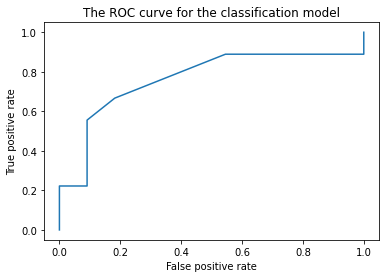

In [32]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('The ROC curve for the classification model')
plt.show()  #choose the better threshold, 0.48275862 is better than 0.51724138 where fpr is still 0.09090909 and tpr is 0.55555556

In [33]:
from sklearn.metrics import roc_auc_score  #auc -> area under curve

In [34]:
auc = roc_auc_score(y_test, y_predict)  #Roc曲线下的面积，介于0.1和1之间。Auc作为数值可以直观的评价分类器的好坏，值越大越好。
auc

0.5656565656565656

In [35]:
x_new = np.array([[3, 1, 2, 2, 4, 5, 1, 3, 5]])  #测试这个人的分类

In [36]:
classifier.predict(x_new)

array([0], dtype=int64)

In [37]:
x_new_3people = np.array([[3, 1, 2, 2, 4, 5, 1, 3, 5],[1, 5, 4, 5, 4, 3, 3, 4, 2],[3, 4, 5, 1, 2, 1, 3, 2, 5]])  #3 people

In [38]:
classifier.predict(x_new_3people)

array([0, 0, 0], dtype=int64)

In [39]:
classifier.predict_proba(x_new)

array([[0.68965517, 0.31034483]])

In [40]:
classifier.predict_proba(x_new_3people)

array([[0.68965517, 0.31034483],
       [0.65517241, 0.34482759],
       [0.62068966, 0.37931034]])